<table style="width:100%">
  <tr>
    <th align="right"><img src="img/dilogo.png" style="float:left;height:90px"></th>
    <th align="center">
    <h1 align="center">Tarea 2</h1>
    <h2 align="center">Profesor: Ricardo Ñanculef</h2>
    <h3 align="center">Ayudante: Fransisco Mena</h3>
    <h3 align="center">Camilo Sanchez Bravo</h3>
    <h3 align="center">201673586-0</h3>
    <h3 align="center">Gabriel Vergara Donoso</h3>
    <h3 align="center">201673605-0</h3>
    <h3 align="center">Noviembre 2019</h3>
    </th> 
    <th align="left"><img src="img/usmlogo.png" style="float:right;height:85px"></th>
  </tr>

## 1. Sentiment Analysis en Texto

In [1]:
import pandas as pd
ftr = open("polarity.train", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in ftr.readlines()]
df_train = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_train['Sentiment'] = (pd.to_numeric(df_train['Sentiment'])+1)/2 # 0 o 1
fts = open("polarity.dev", "r",  encoding="ISO-8859-1")
rows = [line.split(" ",1) for line in fts.readlines()]
df_test = pd.DataFrame(rows, columns=['Sentiment','Text'])
df_test['Sentiment'] = (pd.to_numeric(df_test['Sentiment'])+1)/2 # 0 o 1
df_train_text = df_train.Text
df_test_text = df_test.Text
labels_train = df_train.Sentiment.values
labels_test = df_test.Sentiment.values

a) Describa los datos trabajados, como la cantidad de datos en cada conjunto, largo de los textos, la cantidad de ejemplo por cada clase, o alguna otra forma que piense que pueda ser útil para comprender el problema trabajado.

In [2]:
df_train.columns

Index(['Sentiment', 'Text'], dtype='object')

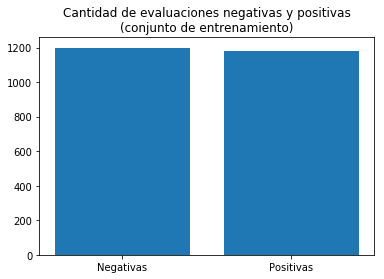

In [20]:
import matplotlib.pyplot as plt
import numpy as np
evaluaciones = np.unique(labels_train, return_counts=True)
plt.bar(["Negativas","Positivas"],evaluaciones[1],align="center")
plt.title("Cantidad de evaluaciones negativas y positivas\n(conjunto de entrenamiento)")
plt.show()

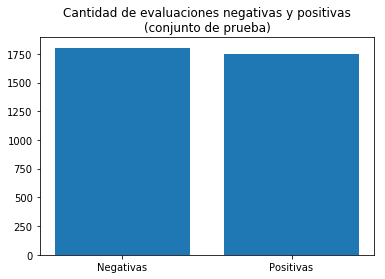

In [21]:
evaluaciones = np.unique(labels_test, return_counts=True)
plt.bar(["Negativas","Positivas"],evaluaciones[1],align="center")
plt.title("Cantidad de evaluaciones negativas y positivas\n(conjunto de prueba)")
plt.show()

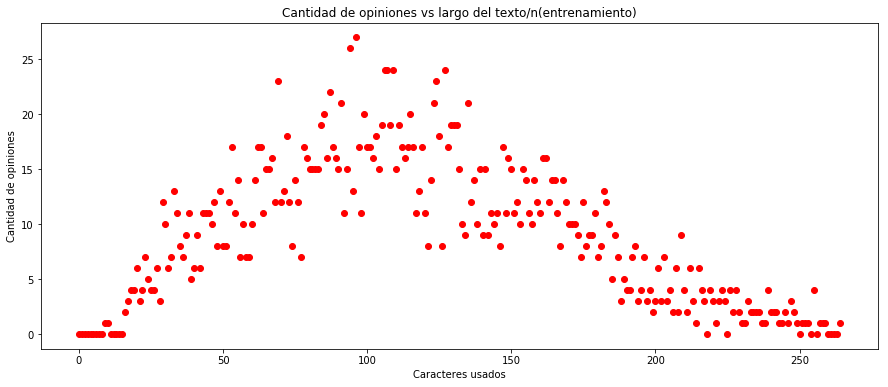

In [22]:
#mayor = 0
#for i in df_train_text.keys():
#    if len(df_train_text[i])>mayor:
#        mayor = len(df_train_text[i])
#print(mayor) ==264
largos = np.zeros(265)
for i in df_train_text.keys():
    largo = len(df_train_text[i])
    largos[largo]+=1
plt.figure(figsize=(15,6))
plt.plot(largos,"ro")
plt.title("Cantidad de opiniones vs largo del texto/n(entrenamiento)")
plt.ylabel("Cantidad de opiniones")
plt.xlabel("Caracteres usados")
plt.show()


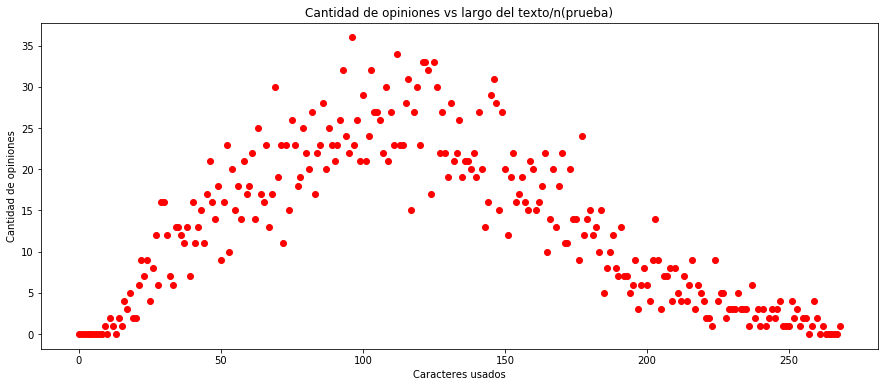

In [23]:
#mayor = 0
#for i in df_test_text.keys():
#    if len(df_test_text[i])>mayor:
#        mayor = len(df_test_text[i])
#print(mayor)==269
largos = np.zeros(269)
for i in df_test_text.keys():
    largo = len(df_test_text[i])
    largos[largo]+=1
plt.figure(figsize=(15,6))
plt.plot(largos,"ro")
plt.title("Cantidad de opiniones vs largo del texto/n(prueba)")
plt.ylabel("Cantidad de opiniones")
plt.xlabel("Caracteres usados")
plt.show()

In [3]:
df_test.shape

(3554, 2)

In [4]:
df_train.shape

(3554, 2)

Los dataset contienen 3554 registros diferentes, cada uno con 2 atributos.

b) Construya un conjunto de validación desde el conjunto de entrenamiento para seleccionar modelos. Decida el tamaño dada la cantidad de ejemplos que se tienen para entrenamiento.

In [5]:
from sklearn.model_selection import train_test_split

df_train_text, df_val_text, labels_train, labels_val  = train_test_split(df_train_text, labels_train, test_size= 0.33, random_state = 0)

El tamaño escogido para el conjunto es de 1/3 con respecto al conjunto de entrenamiento

c) Realice un pre-procesamiento a los textos para normalizar un poco su estructura, para ello utilice el código de ejemplo a continuación, donde se pasa el texto a minúsculas (*lower-casing*), se reducen las mútliples letras, se eliminan palabras sin significados como artículos, pronombres y preposiciones (*stop word removal* [[3]](#refs)), además de pasar las palabras a su tronco léxico con la técnica de *lemmatizer* [[4]](#refs). Comente la importancia de un correcto pre-procesamiento en el domino de lenguaje natural.

In [18]:
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\gverg\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\gverg\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\gverg\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
import re, time
from nltk.corpus import stopwords
from nltk import WordNetLemmatizer, word_tokenize
def base_word(word):
    wordlemmatizer = WordNetLemmatizer()
    return wordlemmatizer.lemmatize(word) 
def word_extractor(text):
    commonwords = stopwords.words('english')
    text = re.sub(r'([a-z])\1+', r'\1\1',text) #substitute multiple letter by two
    words = ""
    wordtokens = [ base_word(word.lower()) for word in word_tokenize(text) ]
    for word in wordtokens:
        if word not in commonwords: #delete stopwords
            words+=" "+word
    return words
#... #try yourself
#word_extractor("I love to eat cake")
#word_extractor("I love eating cake")
#word_extractor("I loved eating the cake")
#word_extractor("I do not love eating cake")
#word_extractor("I don't love eating cake")
#... #try yourself
texts_train = [word_extractor(text) for text in df_train_text]
texts_val = [word_extractor(text) for text in df_val_text]
texts_test = [word_extractor(text) for text in df_test_text]

La importancia del correcto preprocesamiento en el dominio de lenguaje natural está en que es el modo en que la computadora puede reconocer el lenguaje natural humano, es útil para simplificar el texto trabajado por lo que de su correcta implementación depende la eficacia del programa.

d) Construya una representación vectorial a los textos de entrada para poder ser manejados y clasificados por los modelos de aprendizaje. Para ésto utilice el tipo de característica más común, que consiste en contar cuántas veces aparece cada términos/palabras en el texto, denominado **TF** (*term-frequency*). Para esto, se necesita contar con un vocabulario base, el cual se construirá a través de la unión de todas las palabras que observemos en los textos de entrenamiento ¿Cuáles son las palabras más frecuentes?

In [8]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer(ngram_range=(1, 1), binary=False) #TF representation
vectorizer.fit(texts_train)
features_train = vectorizer.transform(texts_train)
... #transform val and test
features_val = vectorizer.transform(texts_val)
features_test = vectorizer.transform(texts_test)
##
vocab = vectorizer.get_feature_names()
dist=list(np.array(features_train.sum(axis=0)).reshape(-1,))

In [75]:
ordenado = dist.copy()
ordenado.sort(reverse=True)
ordenado
cantidad = len(dist)
j=0
for i in range(10):
    j=0
    while(j<cantidad):
        if(ordenado[i]==dist[j]):
            print(vocab[j])
            j=cantidad
        j+=1

film
movie
one
ha
like
make
story
character
even
good



Las 10 palabras más comunes son: film, movie, one, ha, like, make, story, character, even, good. Se puede notar que estas son palabras comunes al dar una opinión sobre una película, ya que son usadas para explicar algo sobre estas mismas. Superficialmente estas palabras no dan información sobre si la opinión es negativa o positiva ya que no tienen carga emocional.

e) Para tener una visión distinta y entender mejor la representación vectorial realizada, visualice los datos en un plano 2D. Para ésto utilice la técnica **LSA** (*Latent Semantic Analysis*) [[5]](#refs) que a diferencia de PCA, **no centra** los datos antes de realizar la descomposicipon SVD, de ésta manera podrá visualizar el espacio semántico de "conceptos" latentes usados en la representación. Coloree cada texto en base a su clase ¿Qué indica lo observado? Comente e interprete los resultados

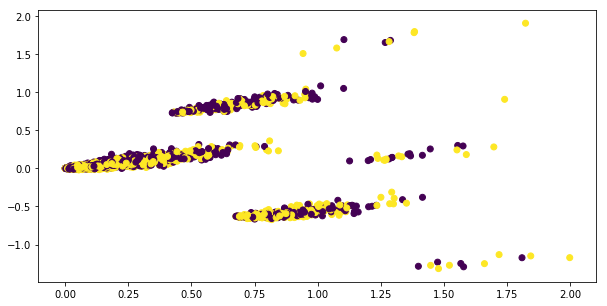

In [24]:
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt
model = TruncatedSVD(n_components=2)
model.fit(features_train)
x_plot = model.transform(features_train)
plt.figure(figsize=(10,5))
plt.scatter(x_plot[:,0], x_plot[:,1], c=labels_train)
plt.show()


Habiendo reducido los atributos a 2 usando la técnica LSA, para determinar la similitud entre palabras y textos, y así visualizar los datos en 2 dimensiones, se obtuvo el gráfico "Datos con 2 atributos". Habiendo solo dos clases separadas por color, se observa que el atributo del el rótulo 'y' hay grupos donde datos de distintas clases se solapan y en el rótulo 'x' los datos están dispersos también a lo largo. Por lo tanto a simple vista no se puede observar una frontera clara entre textos negativos y positivos al disminuir sus atributos.

f) Entrene un modelo de Regresión Logística Regularizado (utilizando como penalizador la norma $l_2$). Varíe el parámetro de regularización $C$, en potencias de 10, midiendo el error de predicción obtenido sobre los datos de entrenamiento y validación, construya un gráfico que muestre la variación de ambos errores respecto al parámetro $C$. Explique el significado y valor esperado del parámetro de regularización.

C:\Users\gverg\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


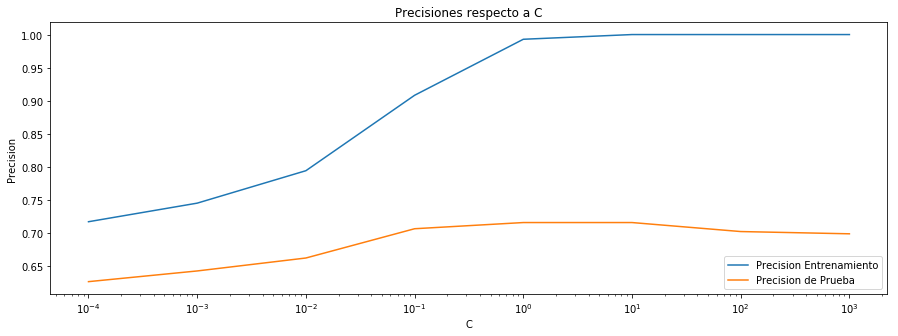

In [76]:
from sklearn.linear_model import LogisticRegression
def do_LOGIT(x,y,xv,yv, param):
    #print("Param C= ",param)
    model= LogisticRegression()
    #model= LogisticRegression(penalty='l2',C=param)
    model.set_params(C=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4,dtype=float)]
ParamC =list()
TrainAcc = list()
TestAcc = list()
for i in Cs:
    model, train_acc, test_acc = do_LOGIT(features_train,labels_train,features_val,labels_val, param= i)
    #print("train_acc: ",train_acc)
    #print("test_acc: ",test_acc)
    ParamC.append(i)
    TrainAcc.append(train_acc)
    TestAcc.append(test_acc)
    
plt.figure(figsize=(15,5))
plt.plot(ParamC, TrainAcc,label="Precision Entrenamiento")
plt.plot(ParamC, TestAcc, label="Precision de Prueba")
plt.xscale('log')
plt.title('Precisiones respecto a C')
plt.legend(loc='lower right')
plt.ylabel("Precision")
plt.xlabel("C")
plt.show()


El parámetro de regularización determina el grado de "poda" que sufren los coeficientes de la solución no regularizada. La elección de C está guiada por el error de predicción del modelo regualrizado. Se suele utilizar un predictor del error de test y se elige el valor que minimiza la estimación.

g) Entrene una Máquina de Soporte Vectorial (SVM) con distintos kernels. Similar a lo anterior, construya un gráfico que muestre la variación de ambos errores respecto al parámetro de regularización $C$ para cada tipo de kernel que experimente. Explique el significado y valor esperado de los parámetros en este modelo.

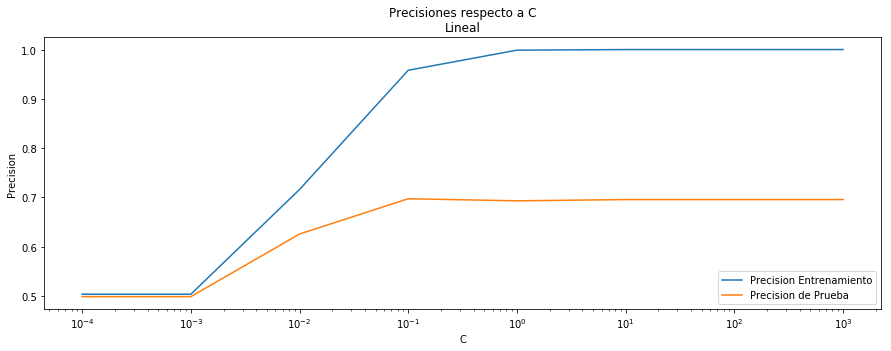

In [77]:
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel='linear'):
    #print("Param C= ",param, 'Kernel= ', kernel)
    model= SVM()
    model.set_params(C=param,kernel=kernel) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4,dtype=float)]
ParamC =list()
TrainAcc = list()
TestAcc = list()
for i in Cs:
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val, param=i)
    #print("train_acc: ",train_acc)
    #print("test_acc: ",test_acc)
    ParamC.append(i)
    TrainAcc.append(train_acc)
    TestAcc.append(test_acc)
    
plt.figure(figsize=(15,5))
plt.plot(ParamC, TrainAcc,label="Precision Entrenamiento")
plt.plot(ParamC, TestAcc, label="Precision de Prueba")
plt.xscale('log')
plt.title('Precisiones respecto a C\nLineal')
plt.legend(loc='lower right')
plt.ylabel("Precision")
plt.xlabel("C")
plt.show()

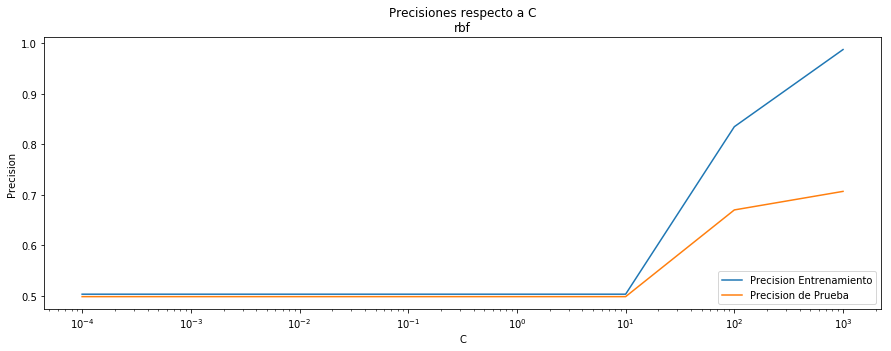

In [79]:
from sklearn.svm import SVC as SVM #SVC is for classification
def do_SVM(x,y,xv,yv, param, kernel='rbf'):
    #print("Param C= ",param, 'Kernel= ', kernel)
    model= SVM()
    model.set_params(C=param,kernel=kernel) #try rbf and linear at least
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Cs = [10**i for i in np.arange(-4,4,dtype=float)]
ParamC =list()
TrainAcc = list()
TestAcc = list()
for i in Cs:
    model, train_acc, test_acc = do_SVM(features_train,labels_train,features_val,labels_val, param=i)
    #print("train_acc: ",train_acc)
    #print("test_acc: ",test_acc)
    ParamC.append(i)
    TrainAcc.append(train_acc)
    TestAcc.append(test_acc)
    
plt.figure(figsize=(15,5))
plt.plot(ParamC, TrainAcc,label="Precision Entrenamiento")
plt.plot(ParamC, TestAcc, label="Precision de Prueba")
plt.xscale('log')
plt.title('Precisiones respecto a C\nrbf')
plt.legend(loc='lower right')
plt.ylabel("Precision")
plt.xlabel("C")
plt.show()

Un valor pequeño de C permite ignorar un gran conjunto de puntos de entrenamiento y enfoca el aprendizaje en la maximización del margen, en cambio un valor grande permite muchas violaciones de las restricciones originales, el enfoque es minimizar el error de entrenamiento. El óptimo de C depende del problema y es elegido usando un estimador del error de predicción.

h) Utilice el algoritmo de similaridad k-NN para intentar resolver el problema. Varíe el parámetro de los vecinos $k$ en un rango que estime conveniente y realice graficos de errores como en las preguntas anteriores. Comente sobre el valor esperado de este parámetro.

In [42]:
features_train.shape

(2381, 7760)

In [80]:
from sklearn.neighbors import KNeighborsClassifier
def do_KNN(x,y,xv,yv, param):
    model = KNeighborsClassifier()
    print("Param K= ",param)
    model.set_params(n_neighbors=param)
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Ks = np.arange(1, features_train.shape[0],100)#100 steps
for i in Ks:
    model, train_acc, test_acc = do_KNN(features_train,labels_train,features_val,labels_val, param=i)
    print("train_acc: ",train_acc)
    print("test_acc: ",test_acc)

Param K=  1
train_acc:  1.0
test_acc:  0.5686274509803921
Param K=  101
train_acc:  0.6157076858462831
test_acc:  0.5387894288150042
Param K=  201
train_acc:  0.628727425451491
test_acc:  0.5583972719522592
Param K=  301
train_acc:  0.6056278874422512
test_acc:  0.5498721227621484
Param K=  401
train_acc:  0.621167576648467
test_acc:  0.5652173913043478
Param K=  501
train_acc:  0.5216295674086519
test_acc:  0.5106564364876386
Param K=  601
train_acc:  0.5665686686266275
test_acc:  0.546462063086104
Param K=  701
train_acc:  0.6035279294414112
test_acc:  0.6069906223358909
Param K=  801
train_acc:  0.6178076438471231
test_acc:  0.5754475703324808
Param K=  901
train_acc:  0.5699286014279714
test_acc:  0.5532821824381927
Param K=  1001
train_acc:  0.5375892482150357
test_acc:  0.5294117647058824
Param K=  1101
train_acc:  0.5279294414111718
test_acc:  0.5311167945439045
Param K=  1201
train_acc:  0.5170096598068039
test_acc:  0.5132139812446718
Param K=  1301
train_acc:  0.5212095758084

i) Entrene un Arbol de Decisión para resolver el problema. Varíe los parámetros de *max depth* y *min samples split* de manera separada, constuyendo gráficos de error respecto a estos parámetros. *Los valores que se presentan son sugerencias, no es necesario utilizar los mismos*. Comente sobre la diferencia entre la selección de estos dos parámetros.

In [84]:
features_train.shape

(2381, 7760)

In [83]:
from sklearn.tree import DecisionTreeClassifier as Tree
def do_Tree(x,y,xv,yv, param_d=None, param_m=2):
    model= Tree()
    print("Param Max-D= ",param_d, 'Min-samples-S= ', param_m)
    model.set_params(max_depth=param_d, min_samples_split=param_m) 
    model.fit(x,y)
    train_acc = model.score(x,y)
    test_acc = model.score(xv,yv)
    return model, train_acc, test_acc
Depths = np.arange(1, features_train.shape[1], 238) #choose steps #238 steps
SamplesS = np.arange(2, features_train.shape[0] , 776 ) #choose steps #776 steps
for i in Depths:
    model, train_acc, test_acc = do_Tree(features_train,labels_train,features_val,labels_val, param_d=i)
    print("train_acc: ",train_acc)
    print("test_acc: ",test_acc)

Param Max-D=  1 Min-samples-S=  2
train_acc:  0.5128097438051239
test_acc:  0.5174765558397272
Param Max-D=  239 Min-samples-S=  2
train_acc:  0.9882402351952961
test_acc:  0.6129582267689685
Param Max-D=  477 Min-samples-S=  2
train_acc:  1.0
test_acc:  0.6112531969309463
Param Max-D=  715 Min-samples-S=  2
train_acc:  1.0
test_acc:  0.6146632566069906
Param Max-D=  953 Min-samples-S=  2
train_acc:  1.0
test_acc:  0.6061381074168798
Param Max-D=  1191 Min-samples-S=  2
train_acc:  1.0
test_acc:  0.6052855924978687
Param Max-D=  1429 Min-samples-S=  2
train_acc:  1.0
test_acc:  0.6231884057971014
Param Max-D=  1667 Min-samples-S=  2
train_acc:  1.0
test_acc:  0.6240409207161125
Param Max-D=  1905 Min-samples-S=  2
train_acc:  1.0
test_acc:  0.6052855924978687
Param Max-D=  2143 Min-samples-S=  2
train_acc:  1.0
test_acc:  0.6078431372549019
Param Max-D=  2381 Min-samples-S=  2
train_acc:  1.0
test_acc:  0.6138107416879796
Param Max-D=  2619 Min-samples-S=  2
train_acc:  1.0
test_acc:  

In [85]:
for i in SamplesS:
    model, train_acc, test_acc = do_Tree(features_train,labels_train,features_val,labels_val, param_m=i)
    print("train_acc: ",train_acc)
    print("test_acc: ",test_acc)

Param Max-D=  None Min-samples-S=  2
train_acc:  1.0
test_acc:  0.6052855924978687
Param Max-D=  None Min-samples-S=  778
train_acc:  0.7404451910961781
test_acc:  0.6112531969309463
Param Max-D=  None Min-samples-S=  1554
train_acc:  0.6035279294414112
test_acc:  0.5643648763853367
Param Max-D=  None Min-samples-S=  2330
train_acc:  0.5128097438051239
test_acc:  0.5174765558397272


j) Utilice una Red Neuronal Artificial (ANN) para intentar resolver el problema, como la que se señala a continuación (utilizando el framework de *keras*): entrenada por 25 iteraciones al dataset (*epochs*) con un tamaño de *batch* de 128 para las actualizaciones de los pesos, utilizando *SGD* con una tasa de aprendizaje $0.1$ sobre la función de pérdida binaria de clasificación. La arquitectura de la red contiene una capa de salida con una única neurona que indica la probabilidad de que el texto sea positivo, una capa escondida con número de neuronas $N_h$ y la capa de entrada implícita para $x$. Varíe el parámetro que corresponde al número de neuronas en la capa oculta $N_h$, en potencias de 2, y vuelva a realizar el gráfico de error con respecto al parámetro. Comente.

In [ ]:
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
def do_ANN(x,y, xv,yv, param):
    print("Neuron hidden = ",param)
    model = Sequential()
    model.add(Dense(units=param, input_dim=x.shape[1], activation="sigmoid"))
    model.add(Dense(1, activation="sigmoid"))
    model.compile(optimizer=SGD(lr=0.1), loss="binary_crossentropy", metrics=["accuracy"])
    model.fit(x, y, epochs=25, batch_size=128, verbose=0)
    train_acc = model.evaluate(x,y, verbose=0)[1] #in position 0 is the loss
    test_acc = model.evaluate(xv,yv, verbose=0)[1]
    return model, train_acc, test_acc
N_h = [2**i for i in range(1,10)]

k) Ahora evalúe sobre el conjunto de pruebas el mejor modelo obtenido, seleccionado en base a la métrica de desempeño en el conjunto de validación. Comente sobre la calidad obtenida en el problema trabajado ¿Es un buen valor? ¿Cuál podría ser un valor de referencia?

l) Para comparar sus resultados utilice el modelo VADER (*Valence Aware Dictionary and sEntiment Reasoner*) [[6]](#refs), el cual entrega una *score* de predicción a nivel léxico (de palabras que comúnmente se asocian a una orientiación positiva o negativa). Este modelo construido manualmente no requiere entrenamiento, por lo que solo debe evaluar en conjunto de pruebas realizando predicciones del texto bruto (sin pre-procesamiento). Comente.


In [59]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
def vader_predict(sentences): 
    sid_obj = SentimentIntensityAnalyzer() 
    sent_v = []
    for text in sentences:
        sentiment_dict = sid_obj.polarity_scores(text) 
        if sentiment_dict["pos"] > sentiment_dict["neg"]: #based on scores
            sent_v.append(1)
        else:
            sent_v.append(0)
    return np.asarray(sent_v)
vader_pred_test = vader_predict(df_test_text) 
from sklearn.metrics import accuracy_score
accuracy_score(labels_test, vader_pred_test)

0.6359032076533483

m) Bajo la idea del modelo VADER realice un análisis de qué palabras su modelo tiende a considerar como positivas o negativas por si solas. Algunos de los modelos estudiados en esta sección realizan una predicción probabilista, utilice uno de éstos para verificar lo solicitado. Sobre la representación *TF* genere datos de entradas que contengan una sola palabra del vocabulario para evaluar que predicción les genera su modelo a esas palabras. Muestre las palabras más negativas y positivas en el vocabulario consideradas por su modelo. Comente.

In [61]:
V = len(vocab)
word_scores = np.zeros((V, 2))
for i in range(V):
    x_word = np.zeros((1, V))
    x_word[:,i] = 1 # only the "i" word appeared
    word_scores[i] = model.predict_proba(x_word)
vocab

['10',
 '100',
 '101',
 '105',
 '10th',
 '11',
 '110',
 '11th',
 '13',
 '13th',
 '14',
 '146',
 '15',
 '16',
 '170',
 '18th',
 '19',
 '1915',
 '1934',
 '1938',
 '1940s',
 '1950',
 '1954',
 '1955',
 '1958',
 '1959',
 '1960s',
 '1972',
 '1975',
 '1978',
 '1979',
 '1980',
 '1992',
 '1995',
 '19th',
 '20',
 '2000',
 '2002',
 '20th',
 '21st',
 '22',
 '25',
 '25s',
 '30',
 '300',
 '3000',
 '30s',
 '37',
 '3d',
 '40',
 '400',
 '401',
 '40s',
 '48',
 '4ever',
 '50',
 '51',
 '53',
 '5ths',
 '60s',
 '65',
 '65th',
 '70s',
 '71',
 '77',
 '78',
 '79',
 '80',
 '800',
 '80s',
 '84',
 '85',
 '88',
 '8th',
 '90',
 '90s',
 '94',
 '95',
 '96',
 '99',
 'aaliyah',
 'abandon',
 'abandono',
 'abbreviated',
 'abel',
 'ability',
 'able',
 'ably',
 'aboul',
 'above',
 'abrahams',
 'abrasive',
 'abroad',
 'abruptly',
 'absolute',
 'absolutely',
 'absorb',
 'absorbed',
 'absorbing',
 'absorption',
 'abstract',
 'absurd',
 'absurdist',
 'absurdity',
 'abuse',
 'acabamos',
 'academic',
 'academy',
 'accent',
 'acc

n) Intente mejorar los resultados de otra manera. Varíe el pre-procesamiento realizado a los datos en c), por ejemplo eliminar símbolos, números o aplicar la técnica de *stemmming* [[7]](#refs) en lugar de *lemmatization* para llevar a su tronco léxico.

In [73]:
from nltk.stem.porter import PorterStemmer
wordstemmer = PorterStemmer()
wordstemmer.stem(word)

NameError: name 'word' is not defined

o) Varíe la representación utilizada actualmente por alguna otra que ayude a mejorar el desempeño, por ejemplo reducir el peso de una palabra si es que aparece en muchos textos: TF-IDF. Existen varias opciones que podría realizar para mejorar el desempeño, por ejemplo reducir el vocabulario a las $K$ palabras más frecuentes, eliminar las palabras menos frecuentes, normalizar la representación, utilizar *n-gramas*, entre otras.

In [74]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_train)
tfidf_model.transform(texts_train)
... #for val and test

Ellipsis

In [72]:
tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_val)
tfidf_model.transform(texts_val)

<1173x5129 sparse matrix of type '<class 'numpy.float64'>'
	with 12543 stored elements in Compressed Sparse Row format>

In [69]:
tfidf_model = TfidfVectorizer(binary=False, ngram_range=(1, 1), max_df=1.0, min_df=1, max_features=None, norm='l2', use_idf=True, sublinear_tf=False)
tfidf_model.fit(texts_test)
tfidf_model.transform(texts_test)

<3554x9818 sparse matrix of type '<class 'numpy.float64'>'
	with 38758 stored elements in Compressed Sparse Row format>

p) Utilice métricas auxiliares para entender en qué falla su mejor modelo obtenido hasta el momento. ¿La información entregada indica cómo se podría mejorar o cual sería la causa de la falla?

In [63]:
from sklearn.metrics import classification_report
def score_the_model(model, x, y):
    print("Detailed Analysis Testing Results ...")
    print(classification_report(y, model.predict(x), target_names=['-','+']))
score_the_model(model, features_test, labels_test )

Detailed Analysis Testing Results ...
              precision    recall  f1-score   support

           -       0.51      1.00      0.67      1803
           +       0.00      0.00      0.00      1751

   micro avg       0.51      0.51      0.51      3554
   macro avg       0.25      0.50      0.34      3554
weighted avg       0.26      0.51      0.34      3554



q) Algo que se puede modificar en algunos modelos de aprendizaje es poner peso en cada una de las clases, por ejemplo si una clase es de mayor interés que las otras e interesa reducir más su error. En *sklearn* ésto puede ser realizado con el parámetro de *class_weights*. Por ejemplo, asigne que detectar los textos negativos me interesa 5 veces más que detectar los textos positivos. Comente.

In [71]:
classes_weights = {0: 5, 1: 1} #or choose..
model.set_params(class_weight=classes_weights)
model.fit(features_train, labels_train)
score_the_model(model, features_test, labels_test)

ValueError: Invalid parameter class_weight for estimator KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=2301, p=2,
           weights='uniform'). Check the list of available parameters with `estimator.get_params().keys()`.

r) Visualice la clasificación que realiza su mejor modelo sobre algunos textos de pruebas ¿Qué entega mas información, una predicción categórica o una continua? ¿Cuál podría ser el beneficio de una o de otra? Comente

In [70]:
test_pred = log_model.predict_proba(features_test) #or ".predict"
spl = np.random.randint( 0, len(test_pred), size=15)
for text, pred_s, true_s in zip(df_test_text[spl], test_pred[spl], labels_test[spl]):
    print("True sent: ", true_s, "-- Pred sent: ",pred_s)
    print("Raw text: ", text)

NameError: name 'log_model' is not defined

s) Comente sobre el desempeño obtenido por los diferentes modelos de aprendizaje utilizados al enfrentar el problema, ¿Dónde pareciera estar la mejora? ¿En la variación de los modelos y sus parámetros o en la modificación de la representación? ¿Cuál modelo de aprendizaje le parece mejor en base a su criterio? ya sea desempeño, tiempo de ejecución comodidad en las decisiones involucradas, etc.

## 2. Problema de Múltiples Anotacione

In [49]:
import pandas as pd
df = pd.read_csv("./sentiment_polarity/mturk_answers.csv")

In [50]:
from sklearn.metrics import accuracy_score
accuracy_score(y_true, y_pred)

NameError: name 'y_true' is not defined

In [51]:
EMBEDDING_DIM = 300
GLOVE_FILE = "./glove.6B.%dd.txt"%(EMBEDDING_DIM)
embeddings_index = {}
with open(GLOVE_FILE) as file:
    for line in file:
        values = line.split()
        embeddings_index[values[0]] = np.asarray(values[1:], dtype='float32')
...
embeddings_index.get(word)

FileNotFoundError: [Errno 2] No such file or directory: './glove.6B.300d.txt'